In [1]:
# Dependencies
import time
import os
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#import data frame for combusion engine cars
ice_df=pd.read_csv("Resources/Edmunds.csv")
display(ice_df.head())
#import data frame for combusion engine cars
hybrid_df=pd.read_csv("Resources/Edmunds.csv")
display(hybrid_df.head())
#import data frame for combusion engine cars
ev_df=pd.read_csv("Resources/Edmunds_ev.csv")
display(ev_df.head())

,info,year 1,year 2,year 3,year 4,year 5,model year,model,engine,cost
0,Insurance,1544,1598,1654,1712,1772,2023,Acura 2023 TLX Sedan 4dr Sedan AWD w/Advance P...,2.0L 4cyl Turbo 10A,53096
1,Maintenance,86,440,386,2465,2049,2023,Acura 2023 TLX Sedan 4dr Sedan AWD w/Advance P...,2.0L 4cyl Turbo 10A,53096
2,Repairs,0,0,0,462,707,2023,Acura 2023 TLX Sedan 4dr Sedan AWD w/Advance P...,2.0L 4cyl Turbo 10A,53096
3,Taxes_Fees,3347,239,214,194,194,2023,Acura 2023 TLX Sedan 4dr Sedan AWD w/Advance P...,2.0L 4cyl Turbo 10A,53096
4,Financing,4197,3421,2566,1628,597,2023,Acura 2023 TLX Sedan 4dr Sedan AWD w/Advance P...,2.0L 4cyl Turbo 10A,53096


,info,year 1,year 2,year 3,year 4,year 5,model year,model,engine,cost
0,Insurance,1544,1598,1654,1712,1772,2023,Acura 2023 TLX Sedan 4dr Sedan AWD w/Advance P...,2.0L 4cyl Turbo 10A,53096
1,Maintenance,86,440,386,2465,2049,2023,Acura 2023 TLX Sedan 4dr Sedan AWD w/Advance P...,2.0L 4cyl Turbo 10A,53096
2,Repairs,0,0,0,462,707,2023,Acura 2023 TLX Sedan 4dr Sedan AWD w/Advance P...,2.0L 4cyl Turbo 10A,53096
3,Taxes_Fees,3347,239,214,194,194,2023,Acura 2023 TLX Sedan 4dr Sedan AWD w/Advance P...,2.0L 4cyl Turbo 10A,53096
4,Financing,4197,3421,2566,1628,597,2023,Acura 2023 TLX Sedan 4dr Sedan AWD w/Advance P...,2.0L 4cyl Turbo 10A,53096


,info,year 1,year 2,year 3,year 4,year 5,model year,model,engine,cost
0,Insurance,1763,1825,1889,1955,2023,2023,Audi e-tron Chronos Edition 4dr SUV AWD,electric DD,88473
1,Maintenance,185,772,413,3544,1690,2023,Audi e-tron Chronos Edition 4dr SUV AWD,electric DD,88473
2,Repairs,0,0,0,801,1223,2023,Audi e-tron Chronos Edition 4dr SUV AWD,electric DD,88473
3,Taxes_Fees,5574,398,356,323,323,2023,Audi e-tron Chronos Edition 4dr SUV AWD,electric DD,88473
4,Financing,6998,5703,4279,2714,994,2023,Audi e-tron Chronos Edition 4dr SUV AWD,electric DD,88473


In [3]:
#addingin column with type
ice_df['type']='internal combustion'
hybrid_df['type']='hybrid'
ev_df['type']='electric'

In [4]:
#distribution of the range of cost of cars in the data set based on engine type
display(f'cost of internal combustion engine cars: max = {ice_df["cost"].max()}, min={ice_df["cost"].min()}, mean={ice_df["cost"].mean()}')
display(f'cost of hybrid cars: max = {hybrid_df["cost"].max()}, min={hybrid_df["cost"].min()}, mean={hybrid_df["cost"].mean()}')
display(f'cost of all electric cars: max = {ev_df["cost"].max()}, min={ev_df["cost"].min()}, mean={ev_df["cost"].mean()}')

'cost of internal combustion engine cars: max = 272287, min=25998, mean=64409.63030660377'

'cost of hybrid cars: max = 272287, min=25998, mean=64409.63030660377'

'cost of all electric cars: max = 112924, min=30119, mean=61693.38775510204'

In [5]:
least=26000
most=113000
# concatinating data frames and removing expensive cars from analysis to match most and least expensive from each type of car
reduced_ice_df = ice_df[(ice_df["cost"]>least) & (ice_df["cost"]<most)]
reduced_hybrid_df = hybrid_df[(hybrid_df["cost"]>least) & (hybrid_df["cost"]<most)]
reduced_ev_df = ev_df[(ev_df["cost"]>least)& (ev_df["cost"]<most)]
ice_hybrid_ev_df=pd.concat((reduced_ice_df, reduced_hybrid_df, reduced_ev_df), ignore_index=True)
ice_hybrid_ev_df.tail()

,info,year 1,year 2,year 3,year 4,year 5,model year,model,engine,cost,type
3408,Repairs,0,0,0,357,545,2023,Volkswagen ID.4 Standard 4dr SUV,electric DD,39993,electric
3409,Taxes_Fees,2525,180,161,146,146,2023,Volkswagen ID.4 Standard 4dr SUV,electric DD,39993,electric
3410,Financing,3163,2578,1934,1227,450,2023,Volkswagen ID.4 Standard 4dr SUV,electric DD,39993,electric
3411,Depreciation,14139,1969,1865,2187,2072,2023,Volkswagen ID.4 Standard 4dr SUV,electric DD,39993,electric
3412,Fuel,874,900,927,955,983,2023,Volkswagen ID.4 Standard 4dr SUV,electric DD,39993,electric


In [6]:
#setting info as index
ice_hybrid_ev_df=ice_hybrid_ev_df.set_index(["info",'model'])

In [7]:
ice_hybrid_ev_df.loc["Depreciation"]

,year 1,year 2,year 3,year 4,year 5,model year,engine,cost,type
model,,,,,,,,,
Acura 2023 TLX Sedan 4dr Sedan AWD w/Advance Package,13282,3928,3209,3595,3141,2023,2.0L 4cyl Turbo 10A,53096,internal combustion
Acura Integra 4dr Hatchback w/A-Spec and Technology Packages,7531,2139,1747,1958,1713,2023,1.5L 4cyl Turbo 6M,37996,internal combustion
Acura Integra 4dr Hatchback w/A-Spec and Technology Packages,7531,2139,1747,1958,1713,2023,1.5L 4cyl Turbo CVT,37996,internal combustion
Acura Integra 4dr Hatchback w/A-SpecvPackage,7454,1967,1608,1802,1576,2023,1.5L 4cyl Turbo CVT,35517,internal combustion
Acura Integra Hatchback 4dr Hatchback,7035,1853,1514,1697,1485,2023,1.5L 4cyl Turbo CVT,33473,internal combustion
...,...,...,...,...,...,...,...,...,...
Volkswagen ID.4 Pro S Plus 4dr SUV w/SK On Battery 170kW DC Fast Charging Capability,18693,2609,2471,2898,2745,2023,electric DD,52941,electric
Volkswagen ID.4 Pro S Plus 4dr SUV w/VW Sound LG Energy Solution Battery 135kW DC Fast Charging Capability,18714,2612,2473,2901,2748,2023,electric DD,53000,electric
Volkswagen ID.4 Pro S Plus 4dr SUV w/VW Sound SK On Battery 170kW DC Fast Charging Capability,18714,2612,2473,2901,2748,2023,electric DD,53000,electric


In [51]:
ice_hybrid_ev_df[ice_hybrid_ev_df["type"]=="internal combustion"].head()

,,year 1,year 2,year 3,year 4,year 5,model year,engine,cost,type
info,model,,,,,,,,,
Insurance,Acura 2023 TLX Sedan 4dr Sedan AWD w/Advance Package,1544,1598,1654,1712,1772,2023,2.0L 4cyl Turbo 10A,53096,internal combustion
Maintenance,Acura 2023 TLX Sedan 4dr Sedan AWD w/Advance Package,86,440,386,2465,2049,2023,2.0L 4cyl Turbo 10A,53096,internal combustion
Repairs,Acura 2023 TLX Sedan 4dr Sedan AWD w/Advance Package,0,0,0,462,707,2023,2.0L 4cyl Turbo 10A,53096,internal combustion
Taxes_Fees,Acura 2023 TLX Sedan 4dr Sedan AWD w/Advance Package,3347,239,214,194,194,2023,2.0L 4cyl Turbo 10A,53096,internal combustion
Financing,Acura 2023 TLX Sedan 4dr Sedan AWD w/Advance Package,4197,3421,2566,1628,597,2023,2.0L 4cyl Turbo 10A,53096,internal combustion


In [56]:
car_depreciation_fraction=ice_hybrid_ev_df.loc["Depreciation"]#pd.DataFrame(columns=['year 1'])
for i in range(5):
    text='year '+str(i+1)
    car_depreciation_fraction[text] = car_depreciation_fraction[text]/car_depreciation_fraction["cost"]*100
car_depreciation_fraction = car_depreciation_fraction.drop(['model year','engine','cost'], axis=1)

C:\Users\kwan\AppData\Local\Temp\ipykernel_18072\1389210605.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car_depreciation_fraction[text] = car_depreciation_fraction[text]/car_depreciation_fraction["cost"]*100


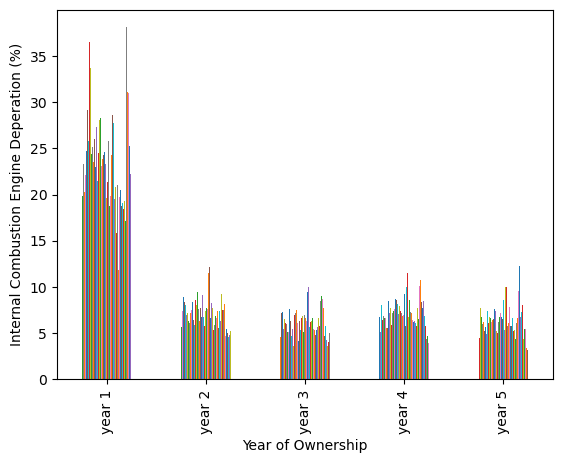

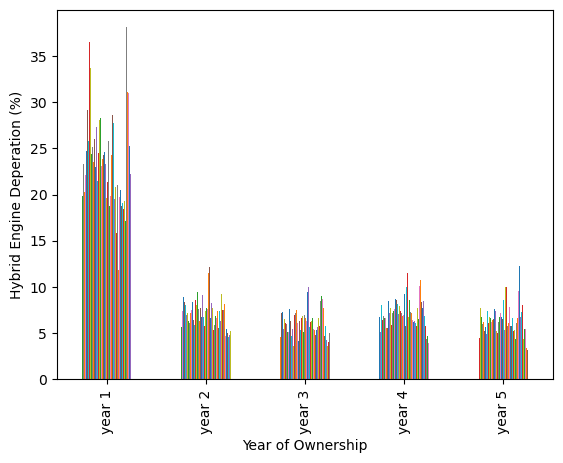

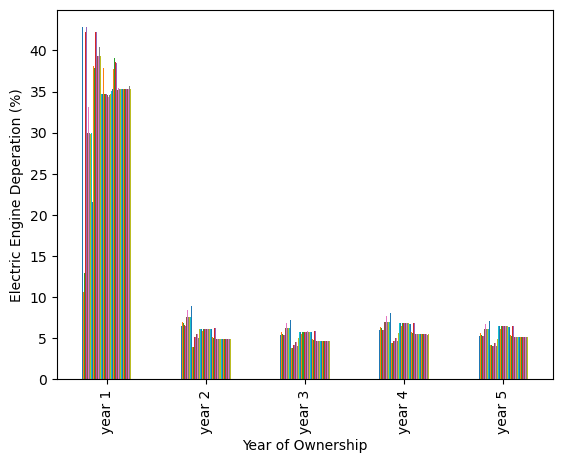

<Figure size 640x480 with 0 Axes>

In [110]:
ice_deprec = car_depreciation_fraction[car_depreciation_fraction['type']=='internal combustion'].T.drop(['type'])
hybrid_deprec = car_depreciation_fraction[car_depreciation_fraction['type']=='hybrid'].T.drop(['type'])
ev_deprec = car_depreciation_fraction[car_depreciation_fraction['type']=='electric'].T.drop(['type'])
#plotting different types of cars
ice_deprec_plot = ice_deprec.plot(kind='bar',legend=False,align="center")#,axes=[0,0])
ice_deprec_plot.set_xlabel("Year of Ownership")
ice_deprec_plot.set_ylabel("Internal Combustion Engine Deperation (%)")

hybrid_deprec_plot = hybrid_deprec.plot(kind='bar',legend=False,align="center")
hybrid_deprec_plot.set_xlabel("Year of Ownership")
hybrid_deprec_plot.set_ylabel("Hybrid Engine Deperation (%)")

ev_deprec_plot =ev_deprec.plot(kind='bar',legend=False,align="center")
ev_deprec_plot.set_xlabel("Year of Ownership")
ev_deprec_plot.set_ylabel("Electric Engine Deperation (%)")

plt.show()
plt.tight_layout()

In [67]:
ice_depreciation_fraction_plot =  car_depreciation_fraction[car_depreciation_fraction['type']=='internal combustion'].T.plot(kind='bar',legend=False,align="center")
#car_depreciation_fraction_plot.set_xlabel("Year of Ownership")
#car_depreciation_fraction_plot.set_ylabel("Percentage of Deperation")

TypeError: no numeric data to plot

In [ ]:
#add up yearly cost based on model and engine type
ice_yearly_cost_df=ice_df.groupby(["model","engine",'cost']).sum()
#fix summing of model year
ice_yearly_cost_df["model year"]=round(ice_yearly_cost_df["model year"]/7,0).astype(int)
ice_yearly_cost_df.head()

In [ ]:
#fig,ax =plt.subplots()
#ax.bar(ice_yearly_cost_df[])
ice_transposed= ice_yearly_cost_df[['year 1', 'year 2', 'year 3', 'year 4', 'year 5']].T
ice_transposed_plot=ice_transposed.plot(kind='bar',legend=False,align="center")#, figsize=(6,8))
ice_transposed_plot.set_xlabel("Year of Ownership")
ice_transposed_plot.set_ylabel("5 Year Cost ($)")

In [ ]:
ice_yearly_cost_df['five_year_cost']=0
for i in range(5):
    text='year '+str(i+1)
    ice_yearly_cost_df['five_year_cost']=ice_yearly_cost_df['five_year_cost']+ice_yearly_cost_df[text]
    

In [ ]:
ice_yearly_cost_df.head()

In [ ]:
ice_yearly_fraction=pd.DataFrame(columns=['a'])
for i in range(5):
    text='year '+str(i+1)
    ice_yearly_fraction[text]=ice_yearly_cost_df[text]/ice_yearly_cost_df['five_year_cost']*100
del ice_yearly_fraction['a']
ice_yearly_fraction
ice_ratio_plot=ice_yearly_fraction.T.plot(kind='bar',legend=False,align="center")
ice_ratio_plot.set_xlabel("Year of Ownership")
ice_ratio_plot.set_ylabel("Fraction of 5 year cost")

In [ ]:
#disbrituion of cost in 1st year
ice_yearly_cost_df['five_year_cost'].hist(bins = 25,legend=True)
ice_yearly_cost_df['year 1'].hist(bins = 25,legend=True)
ice_yearly_cost_df['year 2'].hist(bins = 25,legend=True)
ice_yearly_cost_df['year 3'].hist(bins = 25,legend=True)
ice_yearly_cost_df['year 4'].hist(bins = 25,legend=True)
ice_yearly_cost_df['year 5'].hist(bins = 25,legend=True)

In [ ]:
print("The average total cost to own a new car for the first five years.")
display(f"1 year mean = ${round(ice_yearly_cost_df['year 1'].mean(),2)}")
display(f"2 year mean = ${round((ice_yearly_cost_df['year 1']+ice_yearly_cost_df['year 2']).mean(),2)}")
display((f"3 year mean = $"
         f"{round((ice_yearly_cost_df['year 1']+ice_yearly_cost_df['year 2']+ice_yearly_cost_df['year 3']).mean(),2)}"))
display(f"4 year mean = ${round((ice_yearly_cost_df['year 1']+ice_yearly_cost_df['year 2']+ice_yearly_cost_df['year 3'] +ice_yearly_cost_df['year 4']).mean(),2)}")
display(f"5 year mean = ${round(ice_yearly_cost_df['five_year_cost'].mean(),2)}")

In [ ]:
ice_yearly_cost_df.reset_index(inplace=True)

In [ ]:
#amount paid in addition to the cost of the car over 5 years
ice_yearly_cost_df["expenses"]=ice_yearly_cost_df['five_year_cost']-ice_yearly_cost_df['cost']
ice_yearly_cost_df["expenses"].hist(bins = 25,legend=True)

In [ ]:
ice_cost_per_mile=ice_yearly_cost_df[["model",'engine',"year 1","year 2","year 3","year 4","year 5"]]#.loc["Fuel"]

In [ ]:
for i in range(5):
    text='year '+str(i+1)
    column_name = "cost/mile (" + text+ ")"
    ice_cost_per_mile[column_name]=round(ice_cost_per_mile[text]/15000,2)
ice_cost_per_mile=ice_cost_per_mile.reset_index()

In [ ]:
display(f'year 1 cost/mile mean = ${round(ice_cost_per_mile["cost/mile (year 1)"].mean(),2)}')
display(f'year 2 cost/mile mean = ${round(ice_cost_per_mile["cost/mile (year 2)"].mean(),2)}')
display(f'year 3 cost/mile mean = ${round(ice_cost_per_mile["cost/mile (year 3)"].mean(),2)}')
display(f'year 4 cost/mile mean = ${round(ice_cost_per_mile["cost/mile (year 4)"].mean(),2)}')
display(f'year 5 cost/mile mean = ${round(ice_cost_per_mile["cost/mile (year 5)"].mean(),2)}')

In [ ]:
#create subplot figure with having two side by side plots
fig, axes = plt.subplots(nrows=1,ncols=2)
ice_transposed_plot(kind='bar',legend=False,align="center")
ice_ratio_plot(kind='bar',legend=False,align="center")